# Import libraries

In [35]:
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Activation
from keras import optimizers

from attention import Attention
from keras.models import Sequential
from keras import optimizers

# Load dataset

In [17]:
df = pd.read_csv("./ETH.csv")
df1=df.reset_index()['Price']
df1.head()

0    1736.45
1    1752.80
2    1751.56
3    1840.41
4    1845.68
Name: Price, dtype: float64

In [18]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Split the data into training (70%), test (20%) and validate (10%) sets

In [19]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (444, 1)
Validate shape: (223, 1)


In [20]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [23]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(time_step, 1)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 attention_1 (Attention)     (None, 128)               35600     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
23/23 [==============================] - 7s 98ms/step - loss: 0.0167 - accuracy: 6.8729e-04 - val_loss: 4.8965e-04 - val_accuracy: 0.0000e+00
Epoch 2/300
23/23 [==============================] - 1s 58ms/step - loss: 8.7087e-04 - accuracy: 6.8729e-04 - val_loss: 2.5594e-04 - val_accuracy: 0.0000e+00
Epoch 3/300
23/23 [==============================] - 1s 56ms/step - loss: 8.4542e-04 - accuracy: 6.8729e-04 - val_loss: 2.3817e-04 - val_accuracy: 0.0000e+00
Epoch 4/300
23/23 [==============================] - 1s 53ms/step - loss: 6.3559e-04 - accuracy: 6.8729e-04 - val_loss: 2.0229e-04 - val_accuracy: 0.0000e+00
Epoch 5/300
23/23 [==============================] - 1s 53ms/step - loss: 5.5409e-04 - accuracy: 6.8729e-04 - val_loss: 1.5850e-04 - val_accuracy: 0.0000e+00
Epoch 6/300
23/23 [==============================] - 1s 55ms/step - loss: 5.0728e-04 - accuracy: 6.8729e-04 - val_loss: 1.4806e-04 - val_accuracy: 0.0000e+00
Epoch 7/300
23/23 [==============================] - 1s 

23/23 [==============================] - 1s 49ms/step - loss: 3.4525e-04 - accuracy: 6.8729e-04 - val_loss: 7.7241e-05 - val_accuracy: 0.0000e+00
Epoch 53/300
23/23 [==============================] - 1s 46ms/step - loss: 3.4510e-04 - accuracy: 6.8729e-04 - val_loss: 9.1704e-05 - val_accuracy: 0.0000e+00
Epoch 54/300
23/23 [==============================] - 1s 46ms/step - loss: 4.5491e-04 - accuracy: 6.8729e-04 - val_loss: 8.8750e-05 - val_accuracy: 0.0000e+00
Epoch 55/300
23/23 [==============================] - 1s 46ms/step - loss: 3.5003e-04 - accuracy: 6.8729e-04 - val_loss: 7.7341e-05 - val_accuracy: 0.0000e+00
Epoch 56/300
23/23 [==============================] - 1s 46ms/step - loss: 3.5319e-04 - accuracy: 6.8729e-04 - val_loss: 7.7429e-05 - val_accuracy: 0.0000e+00
Epoch 57/300
23/23 [==============================] - 1s 47ms/step - loss: 3.7006e-04 - accuracy: 6.8729e-04 - val_loss: 8.8510e-05 - val_accuracy: 0.0000e+00
Epoch 58/300
23/23 [==============================] - 1s 47

23/23 [==============================] - 1s 54ms/step - loss: 3.5261e-04 - accuracy: 6.8729e-04 - val_loss: 7.5571e-05 - val_accuracy: 0.0000e+00
Epoch 104/300
23/23 [==============================] - 1s 50ms/step - loss: 3.2676e-04 - accuracy: 6.8729e-04 - val_loss: 7.2641e-05 - val_accuracy: 0.0000e+00
Epoch 105/300
23/23 [==============================] - 1s 56ms/step - loss: 3.5595e-04 - accuracy: 6.8729e-04 - val_loss: 7.2176e-05 - val_accuracy: 0.0000e+00
Epoch 106/300
23/23 [==============================] - 1s 53ms/step - loss: 3.3246e-04 - accuracy: 6.8729e-04 - val_loss: 7.2372e-05 - val_accuracy: 0.0000e+00
Epoch 107/300
23/23 [==============================] - 1s 51ms/step - loss: 3.4919e-04 - accuracy: 6.8729e-04 - val_loss: 9.0320e-05 - val_accuracy: 0.0000e+00
Epoch 108/300
23/23 [==============================] - 1s 47ms/step - loss: 4.0118e-04 - accuracy: 6.8729e-04 - val_loss: 1.0728e-04 - val_accuracy: 0.0000e+00
Epoch 109/300
23/23 [==============================] -

23/23 [==============================] - 1s 46ms/step - loss: 3.3859e-04 - accuracy: 6.8729e-04 - val_loss: 7.6186e-05 - val_accuracy: 0.0000e+00
Epoch 155/300
23/23 [==============================] - 1s 46ms/step - loss: 3.2985e-04 - accuracy: 6.8729e-04 - val_loss: 7.1832e-05 - val_accuracy: 0.0000e+00
Epoch 156/300
23/23 [==============================] - 1s 45ms/step - loss: 3.6395e-04 - accuracy: 6.8729e-04 - val_loss: 7.2556e-05 - val_accuracy: 0.0000e+00
Epoch 157/300
23/23 [==============================] - 1s 46ms/step - loss: 3.1984e-04 - accuracy: 6.8729e-04 - val_loss: 7.4470e-05 - val_accuracy: 0.0000e+00
Epoch 158/300
23/23 [==============================] - 1s 47ms/step - loss: 3.2142e-04 - accuracy: 6.8729e-04 - val_loss: 7.4317e-05 - val_accuracy: 0.0000e+00
Epoch 159/300
23/23 [==============================] - 1s 43ms/step - loss: 3.2719e-04 - accuracy: 6.8729e-04 - val_loss: 7.9321e-05 - val_accuracy: 0.0000e+00
Epoch 160/300
23/23 [==============================] -

23/23 [==============================] - 1s 45ms/step - loss: 2.9685e-04 - accuracy: 6.8729e-04 - val_loss: 8.5090e-05 - val_accuracy: 0.0000e+00
Epoch 206/300
23/23 [==============================] - 1s 45ms/step - loss: 3.2478e-04 - accuracy: 6.8729e-04 - val_loss: 7.3258e-05 - val_accuracy: 0.0000e+00
Epoch 207/300
23/23 [==============================] - 1s 44ms/step - loss: 3.0905e-04 - accuracy: 6.8729e-04 - val_loss: 8.3508e-05 - val_accuracy: 0.0000e+00
Epoch 208/300
23/23 [==============================] - 1s 44ms/step - loss: 2.9104e-04 - accuracy: 6.8729e-04 - val_loss: 7.5650e-05 - val_accuracy: 0.0000e+00
Epoch 209/300
23/23 [==============================] - 1s 40ms/step - loss: 3.2392e-04 - accuracy: 6.8729e-04 - val_loss: 7.4904e-05 - val_accuracy: 0.0000e+00
Epoch 210/300
23/23 [==============================] - 1s 41ms/step - loss: 3.2892e-04 - accuracy: 6.8729e-04 - val_loss: 8.4974e-05 - val_accuracy: 0.0000e+00
Epoch 211/300
23/23 [==============================] -

23/23 [==============================] - 1s 40ms/step - loss: 3.0387e-04 - accuracy: 6.8729e-04 - val_loss: 9.2661e-05 - val_accuracy: 0.0000e+00
Epoch 257/300
23/23 [==============================] - 1s 40ms/step - loss: 3.0355e-04 - accuracy: 6.8729e-04 - val_loss: 7.6370e-05 - val_accuracy: 0.0000e+00
Epoch 258/300
23/23 [==============================] - 1s 39ms/step - loss: 2.6839e-04 - accuracy: 6.8729e-04 - val_loss: 8.3998e-05 - val_accuracy: 0.0000e+00
Epoch 259/300
23/23 [==============================] - 1s 39ms/step - loss: 3.5079e-04 - accuracy: 6.8729e-04 - val_loss: 8.1530e-05 - val_accuracy: 0.0000e+00
Epoch 260/300
23/23 [==============================] - 1s 39ms/step - loss: 4.6415e-04 - accuracy: 6.8729e-04 - val_loss: 7.3133e-05 - val_accuracy: 0.0000e+00
Epoch 261/300
23/23 [==============================] - 1s 43ms/step - loss: 3.5098e-04 - accuracy: 6.8729e-04 - val_loss: 6.6711e-05 - val_accuracy: 0.0000e+00
Epoch 262/300
23/23 [==============================] -

In [25]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 11ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [37]:
def evaluate_sarimax_model(actual, predict):
    mse = mean_squared_error(actual, predict)
    mae = mean_absolute_error(actual, predict)
    mape = mean_absolute_percentage_error(actual, predict)
    rmse = mean_squared_error(actual, predict, squared=False)
    return mse, mae, mape, rmse

In [38]:
val_mse, val_mae, val_mape, val_rmse = evaluate_sarimax_model(yval, y_pred_val)
test_mse, test_mae, test_mape, test_rmse = evaluate_sarimax_model(ytest, y_pred)

In [28]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=162
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        print("x_input:",x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.04631109 0.04723393 0.04860548 0.04907113 0.05305245 0.05363874
 0.05406418 0.05368743 0.04640634 0.04643597 0.04561473 0.04520835
 0.04783716 0.04818428 0.04754295 0.04472576 0.04393839 0.04399977
 0.04508558 0.04666033 0.04648677 0.04420508 0.04631533 0.04782234
 0.04348967 0.0447427  0.04194879 0.04277426 0.03775582 0.03658746
 0.04226628 0.04208214 0.04508347 0.0366573  0.03581067 0.03701289
 0.02935505 0.04056877 0.04446754 0.0451639  0.04531418 0.04641057
 0.0466053  0.05297625 0.05366626 0.04918331 0.04487181 0.05647498
 0.05528334 0.0648821  0.06423653 0.06327983 0.06099814 0.05572571
 0.05592043 0.05268416 0.05183329 0.05118138 0.04925104 0.04841287
 0.05046597 0.04541366 0.04423048 0.04406539 0.045547   0.04604229
 0.04279543 0.04538191 0.04504749 0.04728684 0.04762338 0.04490567
 0.04448659 0.04487604 0.03930516 0.0382003  0.03599481 0.02898042
 0.02983975 0.02840258 0.03008951 0.02476416 0.02360003 0.02602353
 0.02273011 0.02513033 0.02529754 0.02516419 0.030

3 day output [[0.02093237]]
4 day input [0.05305245 0.05363874 0.05406418 0.05368743 0.04640634 0.04643597
 0.04561473 0.04520835 0.04783716 0.04818428 0.04754295 0.04472576
 0.04393839 0.04399977 0.04508558 0.04666033 0.04648677 0.04420508
 0.04631533 0.04782234 0.04348967 0.0447427  0.04194879 0.04277426
 0.03775582 0.03658746 0.04226628 0.04208214 0.04508347 0.0366573
 0.03581067 0.03701289 0.02935505 0.04056877 0.04446754 0.0451639
 0.04531418 0.04641057 0.0466053  0.05297625 0.05366626 0.04918331
 0.04487181 0.05647498 0.05528334 0.0648821  0.06423653 0.06327983
 0.06099814 0.05572571 0.05592043 0.05268416 0.05183329 0.05118138
 0.04925104 0.04841287 0.05046597 0.04541366 0.04423048 0.04406539
 0.045547   0.04604229 0.04279543 0.04538191 0.04504749 0.04728684
 0.04762338 0.04490567 0.04448659 0.04487604 0.03930516 0.0382003
 0.03599481 0.02898042 0.02983975 0.02840258 0.03008951 0.02476416
 0.02360003 0.02602353 0.02273011 0.02513033 0.02529754 0.02516419
 0.03022074 0.03055093 0.

6 day output [[0.02585828]]
7 day input [0.05368743 0.04640634 0.04643597 0.04561473 0.04520835 0.04783716
 0.04818428 0.04754295 0.04472576 0.04393839 0.04399977 0.04508558
 0.04666033 0.04648677 0.04420508 0.04631533 0.04782234 0.04348967
 0.0447427  0.04194879 0.04277426 0.03775582 0.03658746 0.04226628
 0.04208214 0.04508347 0.0366573  0.03581067 0.03701289 0.02935505
 0.04056877 0.04446754 0.0451639  0.04531418 0.04641057 0.0466053
 0.05297625 0.05366626 0.04918331 0.04487181 0.05647498 0.05528334
 0.0648821  0.06423653 0.06327983 0.06099814 0.05572571 0.05592043
 0.05268416 0.05183329 0.05118138 0.04925104 0.04841287 0.05046597
 0.04541366 0.04423048 0.04406539 0.045547   0.04604229 0.04279543
 0.04538191 0.04504749 0.04728684 0.04762338 0.04490567 0.04448659
 0.04487604 0.03930516 0.0382003  0.03599481 0.02898042 0.02983975
 0.02840258 0.03008951 0.02476416 0.02360003 0.02602353 0.02273011
 0.02513033 0.02529754 0.02516419 0.03022074 0.03055093 0.03136793
 0.02800255 0.0303689  

9 day output [[0.0266494]]
10 day input [0.04561473 0.04520835 0.04783716 0.04818428 0.04754295 0.04472576
 0.04393839 0.04399977 0.04508558 0.04666033 0.04648677 0.04420508
 0.04631533 0.04782234 0.04348967 0.0447427  0.04194879 0.04277426
 0.03775582 0.03658746 0.04226628 0.04208214 0.04508347 0.0366573
 0.03581067 0.03701289 0.02935505 0.04056877 0.04446754 0.0451639
 0.04531418 0.04641057 0.0466053  0.05297625 0.05366626 0.04918331
 0.04487181 0.05647498 0.05528334 0.0648821  0.06423653 0.06327983
 0.06099814 0.05572571 0.05592043 0.05268416 0.05183329 0.05118138
 0.04925104 0.04841287 0.05046597 0.04541366 0.04423048 0.04406539
 0.045547   0.04604229 0.04279543 0.04538191 0.04504749 0.04728684
 0.04762338 0.04490567 0.04448659 0.04487604 0.03930516 0.0382003
 0.03599481 0.02898042 0.02983975 0.02840258 0.03008951 0.02476416
 0.02360003 0.02602353 0.02273011 0.02513033 0.02529754 0.02516419
 0.03022074 0.03055093 0.03136793 0.02800255 0.0303689  0.0234561
 0.03021439 0.02250999 0.0

12 day output [[0.03445448]]
13 day input [0.04818428 0.04754295 0.04472576 0.04393839 0.04399977 0.04508558
 0.04666033 0.04648677 0.04420508 0.04631533 0.04782234 0.04348967
 0.0447427  0.04194879 0.04277426 0.03775582 0.03658746 0.04226628
 0.04208214 0.04508347 0.0366573  0.03581067 0.03701289 0.02935505
 0.04056877 0.04446754 0.0451639  0.04531418 0.04641057 0.0466053
 0.05297625 0.05366626 0.04918331 0.04487181 0.05647498 0.05528334
 0.0648821  0.06423653 0.06327983 0.06099814 0.05572571 0.05592043
 0.05268416 0.05183329 0.05118138 0.04925104 0.04841287 0.05046597
 0.04541366 0.04423048 0.04406539 0.045547   0.04604229 0.04279543
 0.04538191 0.04504749 0.04728684 0.04762338 0.04490567 0.04448659
 0.04487604 0.03930516 0.0382003  0.03599481 0.02898042 0.02983975
 0.02840258 0.03008951 0.02476416 0.02360003 0.02602353 0.02273011
 0.02513033 0.02529754 0.02516419 0.03022074 0.03055093 0.03136793
 0.02800255 0.0303689  0.0234561  0.03021439 0.02250999 0.01557602
 0.01827468 0.0238497

15 day output [[0.03598772]]
16 day input [0.04393839 0.04399977 0.04508558 0.04666033 0.04648677 0.04420508
 0.04631533 0.04782234 0.04348967 0.0447427  0.04194879 0.04277426
 0.03775582 0.03658746 0.04226628 0.04208214 0.04508347 0.0366573
 0.03581067 0.03701289 0.02935505 0.04056877 0.04446754 0.0451639
 0.04531418 0.04641057 0.0466053  0.05297625 0.05366626 0.04918331
 0.04487181 0.05647498 0.05528334 0.0648821  0.06423653 0.06327983
 0.06099814 0.05572571 0.05592043 0.05268416 0.05183329 0.05118138
 0.04925104 0.04841287 0.05046597 0.04541366 0.04423048 0.04406539
 0.045547   0.04604229 0.04279543 0.04538191 0.04504749 0.04728684
 0.04762338 0.04490567 0.04448659 0.04487604 0.03930516 0.0382003
 0.03599481 0.02898042 0.02983975 0.02840258 0.03008951 0.02476416
 0.02360003 0.02602353 0.02273011 0.02513033 0.02529754 0.02516419
 0.03022074 0.03055093 0.03136793 0.02800255 0.0303689  0.0234561
 0.03021439 0.02250999 0.01557602 0.01827468 0.02384979 0.02565101
 0.02965561 0.02218615 0

18 day output [[0.04069546]]
19 day input [0.04666033 0.04648677 0.04420508 0.04631533 0.04782234 0.04348967
 0.0447427  0.04194879 0.04277426 0.03775582 0.03658746 0.04226628
 0.04208214 0.04508347 0.0366573  0.03581067 0.03701289 0.02935505
 0.04056877 0.04446754 0.0451639  0.04531418 0.04641057 0.0466053
 0.05297625 0.05366626 0.04918331 0.04487181 0.05647498 0.05528334
 0.0648821  0.06423653 0.06327983 0.06099814 0.05572571 0.05592043
 0.05268416 0.05183329 0.05118138 0.04925104 0.04841287 0.05046597
 0.04541366 0.04423048 0.04406539 0.045547   0.04604229 0.04279543
 0.04538191 0.04504749 0.04728684 0.04762338 0.04490567 0.04448659
 0.04487604 0.03930516 0.0382003  0.03599481 0.02898042 0.02983975
 0.02840258 0.03008951 0.02476416 0.02360003 0.02602353 0.02273011
 0.02513033 0.02529754 0.02516419 0.03022074 0.03055093 0.03136793
 0.02800255 0.0303689  0.0234561  0.03021439 0.02250999 0.01557602
 0.01827468 0.02384979 0.02565101 0.02965561 0.02218615 0.02501603
 0.03199445 0.0341660

21 day output [[0.04150689]]
22 day input [0.04631533 0.04782234 0.04348967 0.0447427  0.04194879 0.04277426
 0.03775582 0.03658746 0.04226628 0.04208214 0.04508347 0.0366573
 0.03581067 0.03701289 0.02935505 0.04056877 0.04446754 0.0451639
 0.04531418 0.04641057 0.0466053  0.05297625 0.05366626 0.04918331
 0.04487181 0.05647498 0.05528334 0.0648821  0.06423653 0.06327983
 0.06099814 0.05572571 0.05592043 0.05268416 0.05183329 0.05118138
 0.04925104 0.04841287 0.05046597 0.04541366 0.04423048 0.04406539
 0.045547   0.04604229 0.04279543 0.04538191 0.04504749 0.04728684
 0.04762338 0.04490567 0.04448659 0.04487604 0.03930516 0.0382003
 0.03599481 0.02898042 0.02983975 0.02840258 0.03008951 0.02476416
 0.02360003 0.02602353 0.02273011 0.02513033 0.02529754 0.02516419
 0.03022074 0.03055093 0.03136793 0.02800255 0.0303689  0.0234561
 0.03021439 0.02250999 0.01557602 0.01827468 0.02384979 0.02565101
 0.02965561 0.02218615 0.02501603 0.03199445 0.03416607 0.0327162
 0.03842466 0.0383019  0.

24 day output [[0.03785319]]
25 day input [0.0447427  0.04194879 0.04277426 0.03775582 0.03658746 0.04226628
 0.04208214 0.04508347 0.0366573  0.03581067 0.03701289 0.02935505
 0.04056877 0.04446754 0.0451639  0.04531418 0.04641057 0.0466053
 0.05297625 0.05366626 0.04918331 0.04487181 0.05647498 0.05528334
 0.0648821  0.06423653 0.06327983 0.06099814 0.05572571 0.05592043
 0.05268416 0.05183329 0.05118138 0.04925104 0.04841287 0.05046597
 0.04541366 0.04423048 0.04406539 0.045547   0.04604229 0.04279543
 0.04538191 0.04504749 0.04728684 0.04762338 0.04490567 0.04448659
 0.04487604 0.03930516 0.0382003  0.03599481 0.02898042 0.02983975
 0.02840258 0.03008951 0.02476416 0.02360003 0.02602353 0.02273011
 0.02513033 0.02529754 0.02516419 0.03022074 0.03055093 0.03136793
 0.02800255 0.0303689  0.0234561  0.03021439 0.02250999 0.01557602
 0.01827468 0.02384979 0.02565101 0.02965561 0.02218615 0.02501603
 0.03199445 0.03416607 0.0327162  0.03842466 0.0383019  0.03870617
 0.0402534  0.0410259

28 day output [[0.03460609]]
29 day input [0.03658746 0.04226628 0.04208214 0.04508347 0.0366573  0.03581067
 0.03701289 0.02935505 0.04056877 0.04446754 0.0451639  0.04531418
 0.04641057 0.0466053  0.05297625 0.05366626 0.04918331 0.04487181
 0.05647498 0.05528334 0.0648821  0.06423653 0.06327983 0.06099814
 0.05572571 0.05592043 0.05268416 0.05183329 0.05118138 0.04925104
 0.04841287 0.05046597 0.04541366 0.04423048 0.04406539 0.045547
 0.04604229 0.04279543 0.04538191 0.04504749 0.04728684 0.04762338
 0.04490567 0.04448659 0.04487604 0.03930516 0.0382003  0.03599481
 0.02898042 0.02983975 0.02840258 0.03008951 0.02476416 0.02360003
 0.02602353 0.02273011 0.02513033 0.02529754 0.02516419 0.03022074
 0.03055093 0.03136793 0.02800255 0.0303689  0.0234561  0.03021439
 0.02250999 0.01557602 0.01827468 0.02384979 0.02565101 0.02965561
 0.02218615 0.02501603 0.03199445 0.03416607 0.0327162  0.03842466
 0.0383019  0.03870617 0.0402534  0.04102596 0.03623399 0.0405984
 0.04264727 0.04821814 

In [39]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

                    MSE         MAE          MAPE        RMSE
Validate   74124.158617  264.832580  12697.171235  272.257523
Test      347804.853632  518.415255   6492.928975  589.749823


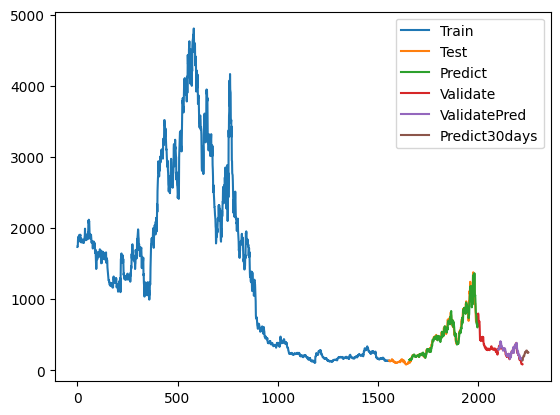

In [29]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()